In [2]:
import pandas as pd
import numpy as np

import re
import string
import os

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
!wget https://github.com/mayanksinghkgp/NLP_Resources/raw/main/Fine_tuning_BERT_twitter/data/train.csv

--2021-12-18 15:56:03--  https://github.com/mayanksinghkgp/NLP_Resources/raw/main/Fine_tuning_BERT_twitter/data/train.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mayanksinghkgp/NLP_Resources/main/Fine_tuning_BERT_twitter/data/train.csv [following]
--2021-12-18 15:56:04--  https://raw.githubusercontent.com/mayanksinghkgp/NLP_Resources/main/Fine_tuning_BERT_twitter/data/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 987711 (965K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>] 964.56K  --.-KB/s    in 0.05s   

2021-12-18 15:56:04 (19.7 MB/s) -

In [5]:
tweet = pd.read_csv('train.csv')

In [6]:
tweet.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
tweet.shape

(7613, 5)

In [8]:
tweet.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [9]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


### EDA

In [10]:
plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams['figure.dpi'] = 80

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Disaster: Real or Not')

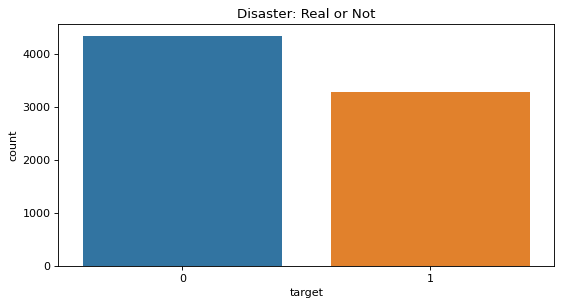

In [11]:
sns.countplot(tweet.target)
plt.title('Disaster: Real or Not')

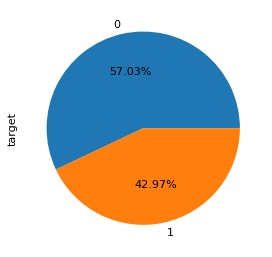

In [12]:
tweet.target.value_counts().plot.pie(autopct = '%1.2f%%')

### Character distribution

In [13]:
!pip install ktrain
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall
import preprocess_kgptalkie as ps

     |████████████████████████████████| 25.3 MB 46.9 MB/s 
     |████████████████████████████████| 6.8 MB 38.7 MB/s 
     |████████████████████████████████| 981 kB 27.7 MB/s 
     |████████████████████████████████| 263 kB 42.1 MB/s 
     |████████████████████████████████| 2.8 MB 33.4 MB/s 
     |████████████████████████████████| 1.2 MB 33.2 MB/s 
     |████████████████████████████████| 468 kB 34.6 MB/s 
     |████████████████████████████████| 61 kB 489 kB/s 
     |████████████████████████████████| 895 kB 35.6 MB/s 
     |████████████████████████████████| 3.3 MB 32.5 MB/s 
     |████████████████████████████████| 596 kB 37.2 MB/s 
  Created wheel for ktrain: filename=ktrain-0.28.3-py3-none-any.whl size=25292659 sha256=aa6dccfe33b281e9241448b21e02e82f91f9d6b5b10e4cd84b3dd1cfe058ddc2
  Stored in directory: /root/.cache/pip/wheels/6a/7e/c3/f46cdfc2b81c54424923b1405d7e670c35cacc11ada9a47b1c
  Created wheel for seqeval: filename=seqeval-0.0.19-py3-none-any.whl size=9929 sha256=9db1f12041af3b3

In [14]:
tweet = ps.get_basic_features(tweet)

In [15]:
tweet.head()

,id,keyword,location,text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,57,13,4.384615,6,1,0,0,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,32,7,4.571429,0,0,0,1,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,112,22,5.090909,9,0,0,1,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,57,8,7.125000,1,1,0,1,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,72,16,4.500000,6,2,0,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


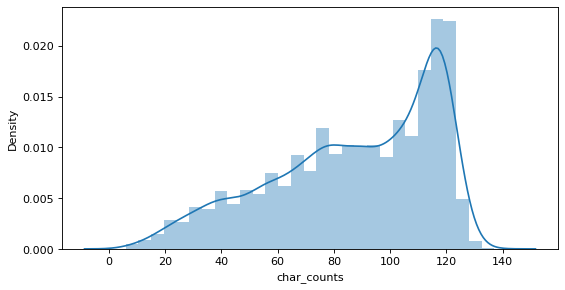

In [16]:
sns.distplot(tweet['char_counts'])

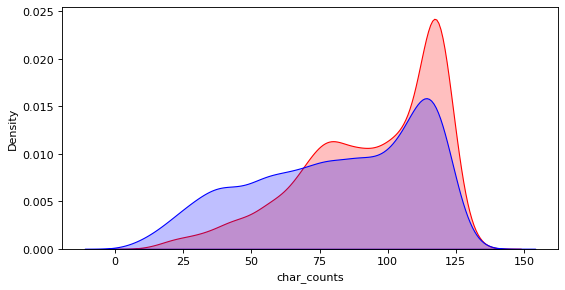

In [17]:
sns.kdeplot(tweet[tweet['target']==1]['char_counts'], shade=True, color='red')
sns.kdeplot(tweet[tweet['target']==0]['char_counts'], shade=True, color='blue')

### Number of Words, Average Words Length, and Stop words Distribution in Tweets

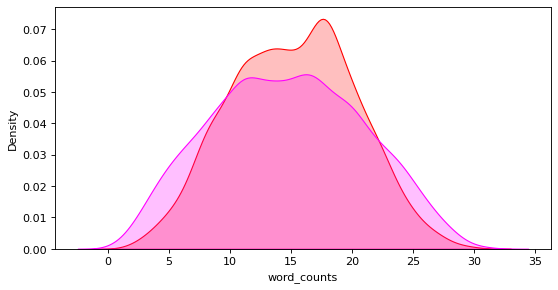

In [18]:
sns.kdeplot(tweet[tweet['target']==1]['word_counts'], shade=True, color='red')
sns.kdeplot(tweet[tweet['target']==0]['word_counts'], shade=True, color='magenta')

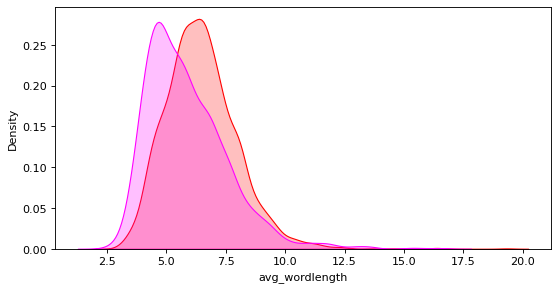

In [19]:
sns.kdeplot(tweet[tweet['target']==1]['avg_wordlength'], shade=True, color='red')
sns.kdeplot(tweet[tweet['target']==0]['avg_wordlength'], shade=True, color='magenta')

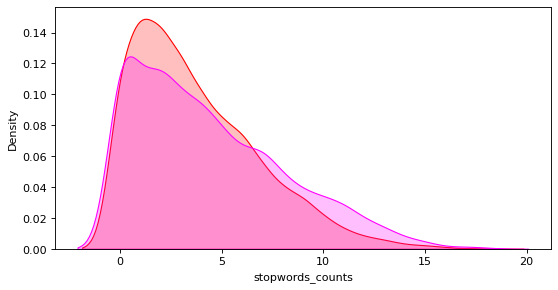

In [20]:
sns.kdeplot(tweet[tweet['target']==1]['stopwords_counts'], shade=True, color='red')
sns.kdeplot(tweet[tweet['target']==0]['stopwords_counts'], shade=True, color='magenta')

### Most & Least common words

In [21]:
freqs = ps.get_word_freqs(tweet, 'text')

In [22]:
top20 = freqs[:20]

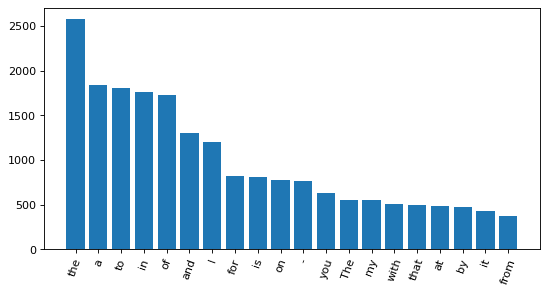

In [23]:
plt.bar(top20.index, top20.values)
plt.xticks(rotation=70)
plt.show()

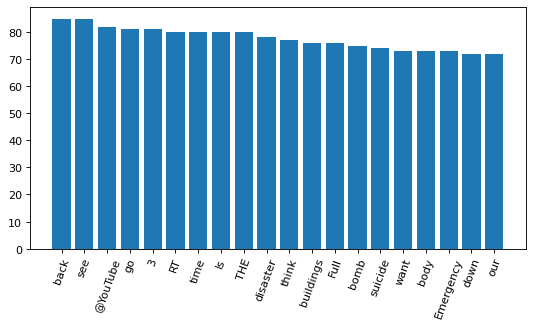

In [24]:
top20 = freqs[100:120]
plt.bar(top20.index, top20.values)
plt.xticks(rotation=70)
plt.show()

In [25]:
least20 = freqs[-20:]
least20

Yemenis                   1
Buroker                   1
de:                       1
Valentine's               1
huh??                     1
LNP                       1
sailors                   1
fluid.                    1
NON                       1
#YES                      1
Margaret                  1
armÛÒ                    1
Negros.                   1
appx                      1
goodbye                   1
incident.                 1
http://t.co/aCMrm833zq    1
Right...                  1
http://t.co/xc96rWUSZb    1
#CADrought                1
dtype: int64

In [26]:
bigram = ps.get_ngram(tweet, 'text', ngram_range=2)

In [27]:
bigram[100:120] #preprocessing not doen yet, so there is noise

[('ûï emergency', 68395),
 ('ûï dylanmcclure55', 68394),
 ('ûï bbcwomanshour', 68393),
 ('ûï bbcengland', 68392),
 ('ûï based_georgie', 68391),
 ('ûï _keits', 68390),
 ('ûªve seen', 68389),
 ('ûªve just', 68388),
 ('ûªve ever', 68387),
 ('ûªve been', 68386),
 ('ûªt watch', 68385),
 ('ûªt warned', 68384),
 ('ûªt want', 68383),
 ('ûªt wanna', 68382),
 ('ûªt wait', 68381),
 ('ûªt say', 68380),
 ('ûªt research', 68379),
 ('ûªt let', 68378),
 ('ûªt know', 68377),
 ('ûªt govern', 68376)]

In [28]:
def get_clean(x):
    x = str(x).lower().replace('\\', ' ').replace('_', ' ').replace('.', ' ')
    x = ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_rt(x)
    x = ps.remove_accented_chars(x)
    x = ps.remove_special_chars(x)
    x = ps.remove_dups_char(x)
    return x

In [29]:
%%time
tweet['text'] = tweet['text'].apply(lambda x: get_clean(x))

CPU times: user 14 s, sys: 402 ms, total: 14.4 s
Wall time: 14.5 s


In [30]:
tweet.head()['text']

0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3    130 people receive wildfires evacuation orders...
4    just got sent this photo from ruby alaska as s...
Name: text, dtype: object

In [31]:
ps.get_ngram(tweet, 'text', ngram_range=2)[:10]

[('zxathetis are', 67861),
 ('zurich for', 67860),
 ('zumiez is', 67859),
 ('zss vs', 67858),
 ('zourryart forgot', 67857),
 ('zouma just', 67856),
 ('zouma has', 67855),
 ('zotar50 skeleton', 67854),
 ('zoom in', 67853),
 ('zonewolf123 liked', 67852)]

### Words visualization for disaster tweets

In [32]:
real = ps.get_word_freqs(tweet[tweet['target']==1], 'text')
real = ' '.join(real.index)
real

'httpt the in of a to and is on for i at by from it that with not you after this fire are was as have my news httpst over up more via an disaster were be people california suicide has no police who but when been like killed do 2 will just hiroshima so than fires out storm crash families we train about now into emergency s your bomb buildings all there mh370 what two nuclear attack they am video wildfire accident get bombing one new northern minister how burning prime legionnaires dead me bomber some if homes car war still atomic obama fatal he years off may us forest collapse city debris retweet watch first today 1 japan malaysia man or latest mass severe near water had before confirmed those earthquake found would oil floods world down 70 spill army under warning home weather wreckage injured outbreak could derailment 3 4 evacuation saudi 40 thunderstorm being migrants old our can missing flood during investigators say flooding their time bridge state her back mosque death suspect cha

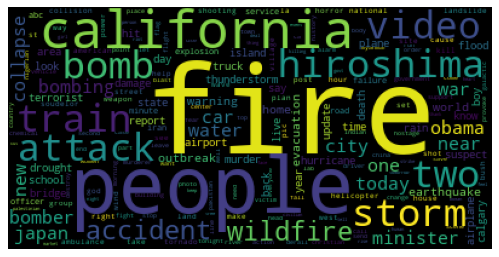

In [33]:
word_cloud = WordCloud(max_font_size=100).generate(real)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

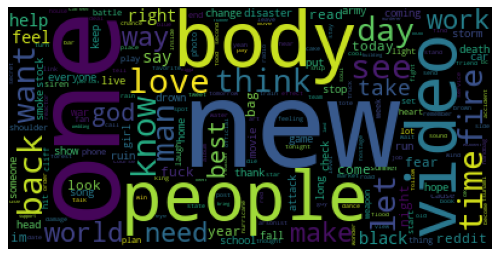

In [34]:
# not a disaster plot

nreal = ps.get_word_freqs(tweet[tweet['target']==0], 'text')
nreal = ' '.join(nreal.index)
word_cloud = WordCloud(max_font_size=100).generate(nreal)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

### Classification with TFIDF and SVM

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.svm import LinearSVC

plt.style.use('ggplot')

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM,Dense, SpatialDropout1D, Dropout
from tensorflow.keras.optimizers import Adam

In [36]:
text = tweet['text']
y = tweet['target']

In [37]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(text)

In [38]:
X.shape

(7613, 22545)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [40]:
def run_SVM(clf, X_train, X_test, y_train, y_test):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)

  print()
  print('Classification Report')
  print(classification_report(y_test, y_pred))

In [41]:
clf = LinearSVC()
run_SVM(clf, X_train, X_test, y_train, y_test)


Classification Report
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       869
           1       0.83      0.69      0.75       654

    accuracy                           0.81      1523
   macro avg       0.81      0.79      0.80      1523
weighted avg       0.81      0.81      0.80      1523



### Word2Vec & SVM

In [42]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9 MB 1.4 MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-py3-none-any.whl size=829180942 sha256=da4d13c797dac154252c2f9eab714ac28d011770404d3ecfd469d478070dab65
  Stored in directory: /tmp/pip-ephem-wheel-cache-vwf0f7cj/wheels/11/95/ba/2c36cc368c0bd339b44a791c2c1881a1fb714b78c29a4cb8f5
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [43]:
import spacy
import en_core_web_lg

In [44]:
nlp = en_core_web_lg.load()

In [45]:
def get_vec(x):
  doc = nlp(x)
  vec = doc.vector
  return vec

In [46]:
tweet['vec'] = tweet['text'].apply(lambda x: get_vec(x))

In [47]:
tweet.head()

,id,keyword,location,text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts,vec
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1,57,13,4.384615,6,1,0,0,1,"[-0.26623327, 0.05843069, -0.1404636, -0.05265..."
1,4,NaN,NaN,forest fire near la ronge sask canada,1,32,7,4.571429,0,0,0,1,0,"[-0.014817425, -0.09212343, -0.10716944, -0.33..."
2,5,NaN,NaN,all residents asked to shelter in place are be...,1,112,22,5.090909,9,0,0,1,0,"[0.0059339865, 0.016337818, -0.105279535, -0.0..."
3,6,NaN,NaN,130 people receive wildfires evacuation orders...,1,57,8,7.125000,1,1,0,1,0,"[-0.13400537, 0.25267026, 0.09032763, -0.16645..."
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1,72,16,4.500000,6,2,0,0,0,"[-0.06394094, -0.01423019, 0.0063574947, 0.071..."


In [48]:
X = tweet['vec'].to_numpy()
X = X.reshape(-1, 1)

In [49]:
X.shape

(7613, 1)

In [50]:
X = np.concatenate(np.concatenate(X, axis=0), axis=0).reshape(-1, 300)

In [51]:
X.shape

(7613, 300)

In [52]:
y = tweet['target']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [54]:
%%time
clf = LinearSVC()
run_SVM(clf, X_train, X_test, y_train, y_test)


Classification Report
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       869
           1       0.81      0.71      0.76       654

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523

CPU times: user 2.47 s, sys: 31.7 ms, total: 2.5 s
Wall time: 2.5 s


### Word embeddings & classification with Deep Learning

In [55]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding,Dropout, SpatialDropout1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, BatchNormalization

In [56]:
text.shape

(7613,)

In [57]:
token = Tokenizer()
token.fit_on_texts(text)

In [58]:
vocab_size = len(token.word_index) + 1
vocab_size

22581

In [59]:
temp = list(token.word_index.keys())[:10]
templ = [(i, token.word_index.get(i))for i in temp]
print(templ)

[('httpt', 1), ('the', 2), ('a', 3), ('in', 4), ('to', 5), ('of', 6), ('i', 7), ('and', 8), ('is', 9), ('you', 10)]


In [60]:
encoded_text = token.texts_to_sequences(text)

In [61]:
print(encoded_text[1])

[186, 43, 223, 763, 6792, 6793, 1328]


In [62]:
max_length = 40
X = pad_sequences(encoded_text, maxlen=max_length, padding='post')

In [63]:
X.shape

(7613, 40)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [65]:
%%time
clf = LinearSVC()
run_SVM(clf, X_train, X_test, y_train, y_test)


Classification Report
              precision    recall  f1-score   support

           0       0.57      0.75      0.65       869
           1       0.44      0.26      0.33       654

    accuracy                           0.54      1523
   macro avg       0.50      0.50      0.49      1523
weighted avg       0.51      0.54      0.51      1523

CPU times: user 743 ms, sys: 12.9 ms, total: 756 ms
Wall time: 745 ms


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [66]:
vec_size = 100

model = Sequential()
model.add(Embedding(vocab_size, vec_size, input_length=max_length))

model.add(Conv1D(64, 2, activation='relu', kernel_regularizer = 'l2'))
model.add(MaxPooling1D(2))
model.add(BatchNormalization())
model.add(SpatialDropout1D(0.5))

model.add(Dense(32, activation='relu', kernel_regularizer = 'l2'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(16, activation='relu', kernel_regularizer = 'l2'))

model.add(GlobalMaxPooling1D())

model.add(Dense(1, activation='sigmoid'))

In [67]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 100)           2258100   
                                                                 
 conv1d (Conv1D)             (None, 39, 64)            12864     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 19, 64)           0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 19, 64)           256       
 ormalization)                                                   
                                                                 
 spatial_dropout1d (SpatialD  (None, 19, 64)           0         
 ropout1D)                                                       
                                                        

In [68]:
%%time
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
191/191 [==============================] - 14s 16ms/step - loss: 2.1005 - accuracy: 0.5553 - val_loss: 1.8211 - val_accuracy: 0.5706
Epoch 2/10
191/191 [==============================] - 3s 14ms/step - loss: 1.6567 - accuracy: 0.6468 - val_loss: 1.5341 - val_accuracy: 0.5968
Epoch 3/10
191/191 [==============================] - 3s 14ms/step - loss: 1.2946 - accuracy: 0.7553 - val_loss: 1.2016 - val_accuracy: 0.7728
Epoch 4/10
191/191 [==============================] - 3s 14ms/step - loss: 0.9870 - accuracy: 0.8397 - val_loss: 0.9802 - val_accuracy: 0.7905
Epoch 5/10
191/191 [==============================] - 3s 14ms/step - loss: 0.7318 - accuracy: 0.8903 - val_loss: 0.8792 - val_accuracy: 0.7774
Epoch 6/10
191/191 [==============================] - 3s 14ms/step - loss: 0.5257 - accuracy: 0.9307 - val_loss: 0.8280 - val_accuracy: 0.7866
Epoch 7/10
191/191 [==============================] - 3s 14ms/step - loss: 0.3906 - accuracy: 0.9521 - val_loss: 0.8354 - val_accuracy: 0.757

In [69]:
def get_encoded(x):
  x = get_clean(x)
  x = token.texts_to_sequences([x])
  x = pad_sequences(x, maxlen=max_length, padding='post')
  return x

In [70]:
x = 'on the plus side look at the sky it was ablaze'
vec = get_encoded(x)

In [71]:
vec

array([[  12,    2, 1867,  795,  163,   18,    2, 1056,   13,   25,  615,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0]], dtype=int32)

In [72]:
np.argmax(model.predict(vec), axis = -1)

array([0])

### BERT training

In [73]:
!pip install ktrain

In [74]:
tweet.head()

,id,keyword,location,text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts,vec
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1,57,13,4.384615,6,1,0,0,1,"[-0.26623327, 0.05843069, -0.1404636, -0.05265..."
1,4,NaN,NaN,forest fire near la ronge sask canada,1,32,7,4.571429,0,0,0,1,0,"[-0.014817425, -0.09212343, -0.10716944, -0.33..."
2,5,NaN,NaN,all residents asked to shelter in place are be...,1,112,22,5.090909,9,0,0,1,0,"[0.0059339865, 0.016337818, -0.105279535, -0.0..."
3,6,NaN,NaN,130 people receive wildfires evacuation orders...,1,57,8,7.125000,1,1,0,1,0,"[-0.13400537, 0.25267026, 0.09032763, -0.16645..."
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1,72,16,4.500000,6,2,0,0,0,"[-0.06394094, -0.01423019, 0.0063574947, 0.071..."


In [75]:
from ktrain import text
import ktrain

In [76]:
(X_train, y_train), (X_test, y_test), preproc = text.texts_from_df(train_df=tweet, 
                                                                   text_column='text', 
                                                                   label_columns='target', 
                                                                   maxlen=40, 
                                                                   preprocess_mode='bert')

['not_target', 'target']
      not_target  target
36           1.0     0.0
5436         0.0     1.0
4984         0.0     1.0
207          0.0     1.0
5298         0.0     1.0
['not_target', 'target']
      not_target  target
5850         1.0     0.0
2484         1.0     0.0
2519         1.0     0.0
3890         1.0     0.0
5105         0.0     1.0
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [77]:
model = text.text_classifier(name='bert', train_data=(X_train, y_train), preproc=preproc)

Is Multi-Label? False
maxlen is 40
done.


In [78]:
learner = ktrain.get_learner(model=model, train_data=(X_train, y_train), val_data=(X_test, y_test), batch_size=64)

In [79]:
# learner.fit_onecycle(lr = 2e-5, epochs=1)

more number of cycles:

In [80]:
# learner.fit_onecycle(lr = 2e-5, epochs=3)

Higher learning rate:

In [81]:
learner = ktrain.get_learner(model=model, train_data=(X_train, y_train), val_data=(X_test, y_test), batch_size=64)
learner.fit_onecycle(lr = 2e-4, epochs=3)



begin training using onecycle policy with max lr of 0.0002...
Epoch 1/3
108/108 [==============================] - 154s 1s/step - loss: 0.4432 - accuracy: 0.8011 - val_loss: 0.4036 - val_accuracy: 0.8451
Epoch 2/3
108/108 [==============================] - 113s 1s/step - loss: 0.3680 - accuracy: 0.8526 - val_loss: 0.5086 - val_accuracy: 0.7913
Epoch 3/3
108/108 [==============================] - 113s 1s/step - loss: 0.2112 - accuracy: 0.9251 - val_loss: 0.5050 - val_accuracy: 0.8202


In [82]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [83]:
data = ['Some days are just crazy, i ran into Shaktiman today by accident', 'i got into a car accident today, guess my weekend is ruined']

In [84]:
predictor.predict(data, return_proba=True)

/usr/local/lib/python3.7/dist-packages/ktrain/text/preprocessor.py:215: UserWarning: List or array of two texts supplied, so task being treated as text classification. If this is a sentence pair classification task, please cast to tuple.
  warnings.warn('List or array of two texts supplied, so task being treated as text classification. ' +\


array([[0.89220446, 0.10779558],
       [0.5705098 , 0.42949024]], dtype=float32)

In [85]:
classes = predictor.get_classes()

In [86]:
y_pred = predictor.predict(data[1])
classes.index(y_pred)

0

In [87]:
predictor.save('/content/bert_model')
!zip -r bert_model_twitter.zip bert_model
!cp bert_model_twitter.zip drive/MyDrive/Colab_Files/bert_model_twitter.zip

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


  adding: bert_model/ (stored 0%)
  adding: bert_model/tf_model.h5 (deflated 16%)
  adding: bert_model/tf_model.preproc (deflated 52%)
